In [1]:
import pickle
with open('x_list.pkl','rb') as f:
    x_prepared = pickle.load(f)

In [2]:
import pandas as pd
data = pd.read_csv("final_data.csv")

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=20000)
x = vectorizer.fit_transform([" ".join(text) for text in x_prepared]).toarray()

In [4]:
x.shape

(18650, 20000)

In [5]:
import numpy as np
x_train,x_test,y_train,y_test = train_test_split(x,np.asarray(data["Label"]),random_state=42,test_size=0.2)
x_train.shape

(14920, 20000)

In [6]:
import time
start_time = time.time()
NB = GaussianNB()
NB.fit(x_train,y_train)
end_time = time.time()

print(round(end_time-start_time,2))

25.07


In [7]:
NB.score(x_test,y_test)

0.8187667560321715

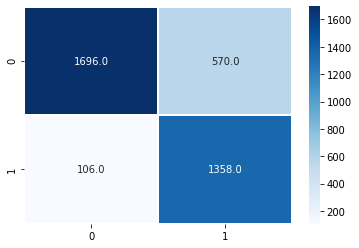

In [14]:
from sklearn.metrics import confusion_matrix
y_pred = NB.predict(x_test)

conf = confusion_matrix(y_pred=y_pred,y_true=y_test)
import seaborn
seaborn.heatmap(conf,annot=True,fmt=".1f",linewidths=1.5,cmap="Blues")#cmap="YlGnBu"
import matplotlib.pyplot as plt
plt.show()

In [15]:
import pickle
# We will save count vectorizer and model
with open("model.pckl",mode="wb") as F:
    pickle.dump(NB,F)
    
with open("vectorizer.pckl",mode="wb") as F:
    pickle.dump(vectorizer,F)